In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
res_eda_df = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/restaurants_limited_features.csv")

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_15887/4177937186.py:1: DtypeWarning: Columns (14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  res_eda_df = pd.read_csv("/Users/dima/code/Dimasaur/scorecast/restaurants_limited_features.csv")


In [9]:
print(res_eda_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52268 entries, 0 to 52267
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        52268 non-null  int64  
 1   index             52268 non-null  int64  
 2   business_id       52268 non-null  object 
 3   postal_code       52247 non-null  object 
 4   latitude          52268 non-null  float64
 5   longitude         52268 non-null  float64
 6   stars             52268 non-null  float64
 7   review_count      52268 non-null  int64  
 8   is_open           52268 non-null  int64  
 9   food_type         52268 non-null  object 
 10  delivery          49672 non-null  object 
 11  alcohol           52268 non-null  bool   
 12  bike_parking      52234 non-null  object 
 13  credit_card       52242 non-null  object 
 14  appointment_only  52267 non-null  object 
 15  caters            52221 non-null  object 
 16  coat_check        52266 non-null  object

In [12]:
print(res_eda_df.columns)

Index(['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'food_type',
       'delivery', 'alcohol', 'bike_parking', 'credit_card',
       'appointment_only', 'caters', 'coat_check', 'dogs', 'drive_thru',
       'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair'],
      dtype='object')


(0.0, 1000.0)

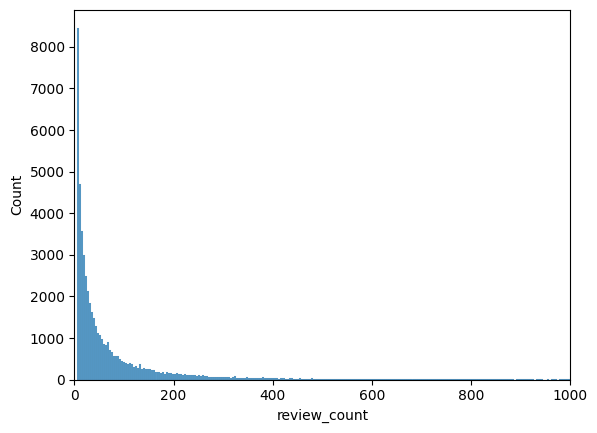

In [17]:
sns.histplot(res_eda_df.review_count)
plt.xlim(0,1000)

<Axes: xlabel='price_range', ylabel='Count'>

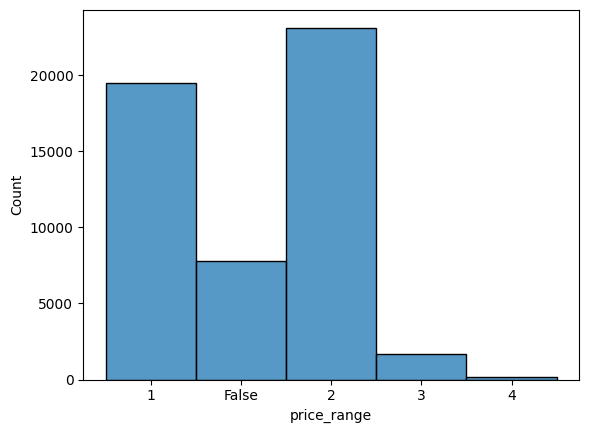

In [19]:
sns.histplot(res_eda_df.price_range)

<Axes: xlabel='is_open', ylabel='Count'>

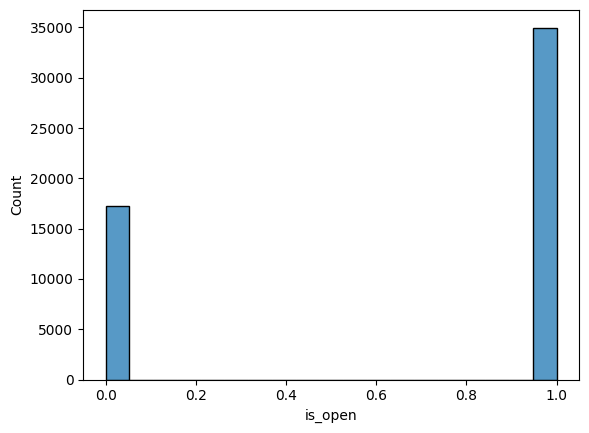

In [20]:
sns.histplot(res_eda_df.is_open)

In [28]:
res_eda_df.food_type.value_counts(normalize=True)

food_type
['O']                               0.624570
['Pizza']                           0.033768
['Mexican']                         0.027416
['Chinese']                         0.026020
['Burgers', 'Fast Food']            0.015937
                                      ...   
['Cafes', 'Salad']                  0.000019
['Local Flavor', 'Polish']          0.000019
['Cafes', 'Soup']                   0.000019
['Food', 'Salad']                   0.000019
['Indian', 'Tapas/Small Plates']    0.000019
Name: proportion, Length: 988, dtype: float64

<Axes: xlabel='happy_hour', ylabel='Count'>

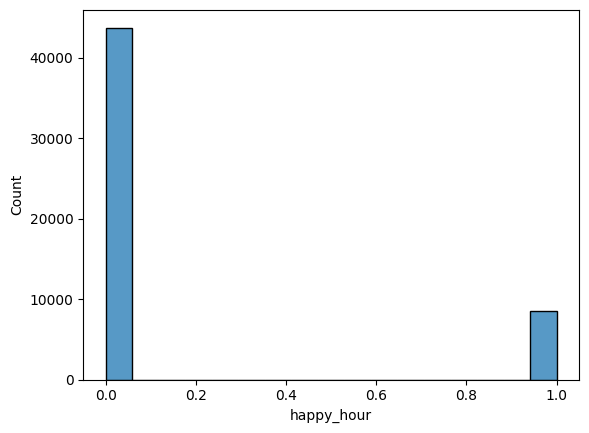

In [25]:
sns.histplot(res_eda_df.happy_hour)

In [47]:
res_eda_df.head()


In [68]:
features_to_encode = ['good_for_kids','good_for_groups','happy_hour','tv','outdoor_seating','reservations','table_service','take_out', 'wheelchair']

# Step 1: Fill NaN values with the mode for each feature
for feature in features_to_encode:
    # Calculate the mode of the column
    mode_value = res_eda_df[feature].mode()[0]

    # Fill NaN values with the mode
    res_eda_df[feature].fillna(mode_value, inplace=True)

res_eda_df[features_to_encode] = res_eda_df[features_to_encode].astype(int)

/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_15887/3693386324.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  res_eda_df[feature].fillna(mode_value, inplace=True)
/var/folders/fd/585jf60x39vflmpy4gfz7yzh0000gn/T/ipykernel_15887/3693386324.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [81]:
res_eda_df_drop_pr = res_eda_df[res_eda_df['price_range'] != 'False']
res_eda_df_drop_pr.shape

(44500, 30)

In [83]:
res_eda_df_drop_pr.columns

Index(['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude', 'stars', 'review_count', 'is_open', 'food_type',
       'delivery', 'alcohol', 'bike_parking', 'credit_card',
       'appointment_only', 'caters', 'coat_check', 'dogs', 'drive_thru',
       'good_for_kids', 'good_for_groups', 'happy_hour', 'tv',
       'outdoor_seating', 'price_range', 'reservations', 'table_service',
       'take_out', 'wheelchair', 'features_to_encode'],
      dtype='object')

In [86]:
corr_features = res_eda_df_drop_pr.drop(columns=['Unnamed: 0', 'index', 'business_id', 'postal_code', 'latitude',
       'longitude','food_type','features_to_encode'])

<Axes: >

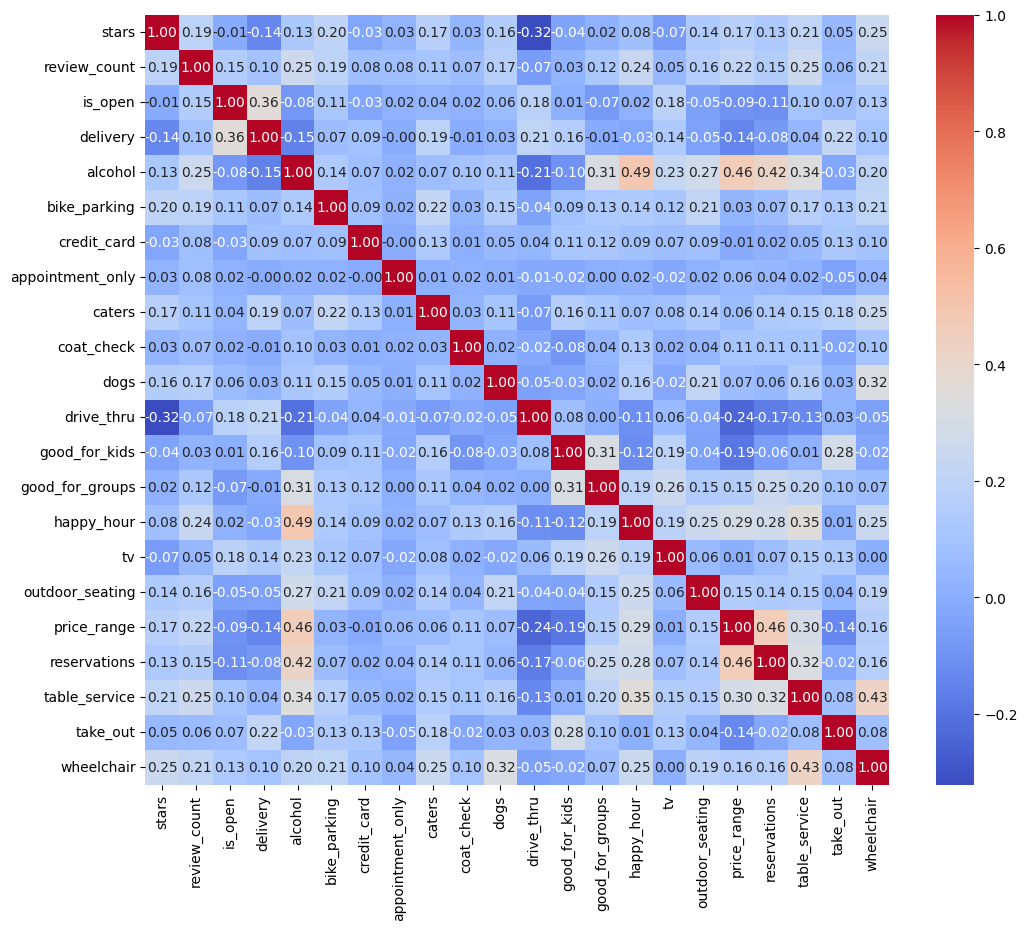

In [89]:
correlation_matrix = corr_features.corr()
plt.figure(figsize = (12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
